In [12]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

torch.manual_seed(1)

import matplotlib.pyplot as plt
%matplotlib inline

### 토이 데이터 생성

In [14]:
x = torch.arange(1,101)
x = Variable(x).unsqueeze(1) # view(-1,1)

y = torch.linspace(0,10,100) + torch.randn(100)
y = Variable(y).unsqueeze(1) # view(-1,1)

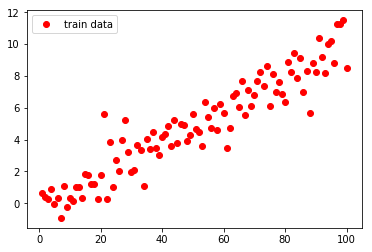

In [15]:
plt.plot(x.data.numpy(), y.data.numpy(), 'ro', label='train data')
# plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

### 모델링 

In [22]:
model = nn.Linear(1,1)
print([p for p in model.parameters()])

loss_function = nn.MSELoss()

[Parameter containing:
-0.2095
[torch.FloatTensor of size 1x1]
, Parameter containing:
-0.9026
[torch.FloatTensor of size 1]
]


### 트레이닝 

In [17]:
EPOCH=6
learning_rate=0.0001

[0/6] loss : 61.209


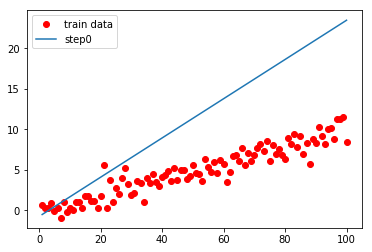

[1/6] loss : 7.428


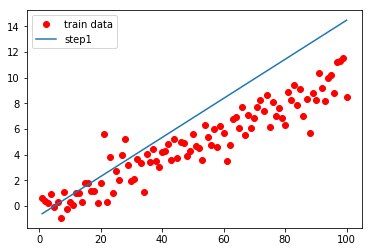

[2/6] loss : 1.812


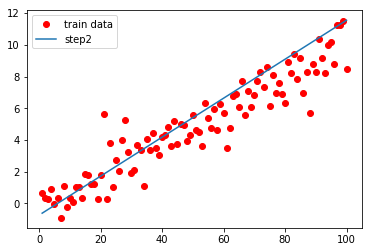

[3/6] loss : 1.226


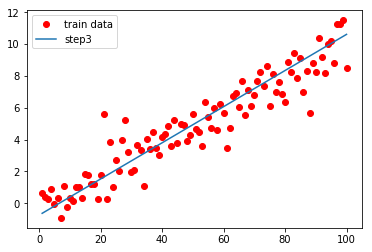

[4/6] loss : 1.165


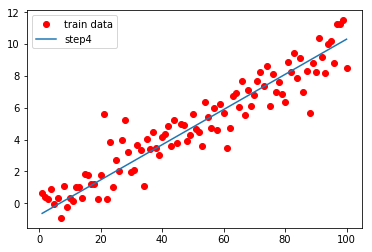

[5/6] loss : 1.158


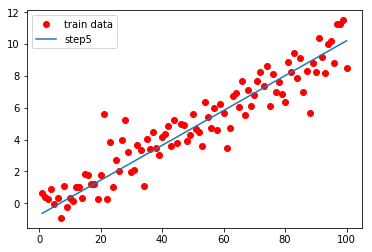

In [18]:
for epoch in range(EPOCH):
    model.zero_grad()
    pred = model(x)
    loss = loss_function(pred,y)
    
    print("[%d/%d] loss : %.3f" % (epoch,EPOCH,loss.data[0]))
    plt.plot(x.data.numpy(), y.data.numpy(), 'ro', label='train data')
    plt.plot(x.data.numpy(), pred.data.numpy(), label='step'+str(epoch))
    plt.legend()
    plt.show()
    
    # gradient descent
    loss.backward()
    for param in model.parameters():
        param.data += -learning_rate*param.grad.data
        #param.data.add_(-learning_rate, param.grad.data)

### TODO list 

* 모델을 클래스 형태로 바꿔보기 (nn.Module 상속)
* 변수를 더 늘려보기 (univariate -> multivariate)
* learning rate 바꿔보기 (늘리거나 줄여서 결과 확인해보기)
* optimizer를 사용해서 gradient descent해보기